In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder = '/home/wassim/Downloads/pmesh/traces/mesh_1024/pdims_4x2/box_1024'
pdims=(4 ,2)

init_field_slices = []
field_slices = []
nb_solutions = 0
final_slices = []

for _ in range(nb_solutions):
    final_slices.append([])

for i in range(pdims[0]):
    row_init_field = []
    row_field = []
    row_final_field = []
    for _ in range(nb_solutions):
        row_final_field.append([])
    
    for j in range(pdims[1]):
        slice_index = i * pdims[1]  + j 
        row_field.append(np.load(f'{folder}/field_{slice_index}.npy'))
        row_init_field.append(np.load(f'{folder}/initial_conditions_{slice_index}.npy'))

        for sol_indx in range(nb_solutions):
            row_final_field[sol_indx].append(np.load(f'{folder}/final_field_{sol_indx}_{slice_index}.npy'))
    

    field_slices.append(np.vstack(row_field))
    init_field_slices.append(np.vstack(row_init_field))

    for sol_indx in range(nb_solutions):
        final_slices[sol_indx].append(np.vstack(row_final_field[sol_indx]))


field = np.hstack(field_slices)
initial_conditions = np.hstack(init_field_slices)
final_fields = []
for sol_indx in range(nb_solutions):
    final_fields.append(np.hstack(final_slices[sol_indx]))
    
field.shape

(1024, 1024, 1024)

In [42]:
np.savez('/home/wassim/Projects/NBody/Blender_tutorial/jaxpm/initial_conditions.npz', initial_conditions)

In [43]:
np.load('/home/wassim/Projects/NBody/Blender_tutorial/jaxpm/initial_conditions.npz')

NpzFile '/home/wassim/Projects/NBody/Blender_tutorial/jaxpm/initial_conditions.npz' with keys: arr_0

In [6]:
import matplotlib.pyplot as plt

plot_slices = False
proj_axis = 0
box_size = 1024
nb_solutions = len(final_fields)  # Assuming you have this variable defined elsewhere
slice_sum = initial_conditions.shape[0] // 64
# Plot initial conditions
initial_summed = initial_conditions[-slice_sum:].sum(axis=proj_axis)
plt.figure(figsize=(24, 12))
plt.imshow(initial_summed, cmap='magma', extent=[0, box_size + 5, 0, box_size + 5])
plt.axis('off')
plt.savefig(f'initial_conditions_{initial_conditions.shape[0]}.png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.close()

print(f"shape of initial_summed: {initial_summed.shape}")
print(f"shape of first quarter: {initial_summed[0:initial_summed.shape[0] // 4].shape}")

if plot_slices:
    for i in range(4):
        start = i * initial_summed.shape[0] // 4
        end = (i + 1) * initial_summed.shape[0] // 4
        plt.figure(figsize=(24, 12))
        plt.imshow(initial_summed[start:end], cmap='magma')
        plt.axis('off')
        plt.savefig(f'initial_conditions_{i}.png', dpi=600, bbox_inches='tight', pad_inches=0)
        plt.close()

# Plot LPT density field at z=0
field_summed = np.log10(field[:slice_sum].sum(axis=proj_axis) + 1) 

plt.figure(figsize=(24, 12))
plt.imshow((field_summed) + 1, cmap='magma', extent=[0, box_size + 5, 0, box_size + 5])
plt.axis('off')
plt.savefig(f'LPT_density_field_z0_{initial_conditions.shape[0]}.png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.close()

if plot_slices:
    for i in range(4):
        start = i * field_summed.shape[0] // 4
        end = (i + 1) * field_summed.shape[0] // 4
        plt.figure(figsize=(24, 12))
        plt.imshow(field_summed[start:end], cmap='magma')
        plt.axis('off')
        plt.savefig(f'LPT_density_field_z0_{i}.png', dpi=600, bbox_inches='tight', pad_inches=0)
        plt.close()

for indx in range(nb_solutions):
    # Plot final field 0
    plt.figure(figsize=(12, 6))
    plt.imshow(final_fields[indx].sum(axis=proj_axis), cmap='magma', extent=[0, box_size + 5, 0, box_size + 5])
    plt.axis('off')
    plt.savefig(f'final_field_0_solution_{indx}.png', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()

    # Plot final field 1
    plt.figure(figsize=(12, 6))
    plt.imshow(final_fields[indx].sum(axis=proj_axis), cmap='magma', extent=[0, box_size + 5, 0, box_size + 5])
    plt.axis('off')
    plt.savefig(f'final_field_1_solution_{indx}.png', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()


shape of initial_summed: (1024, 1024)
shape of first quarter: (256, 1024)


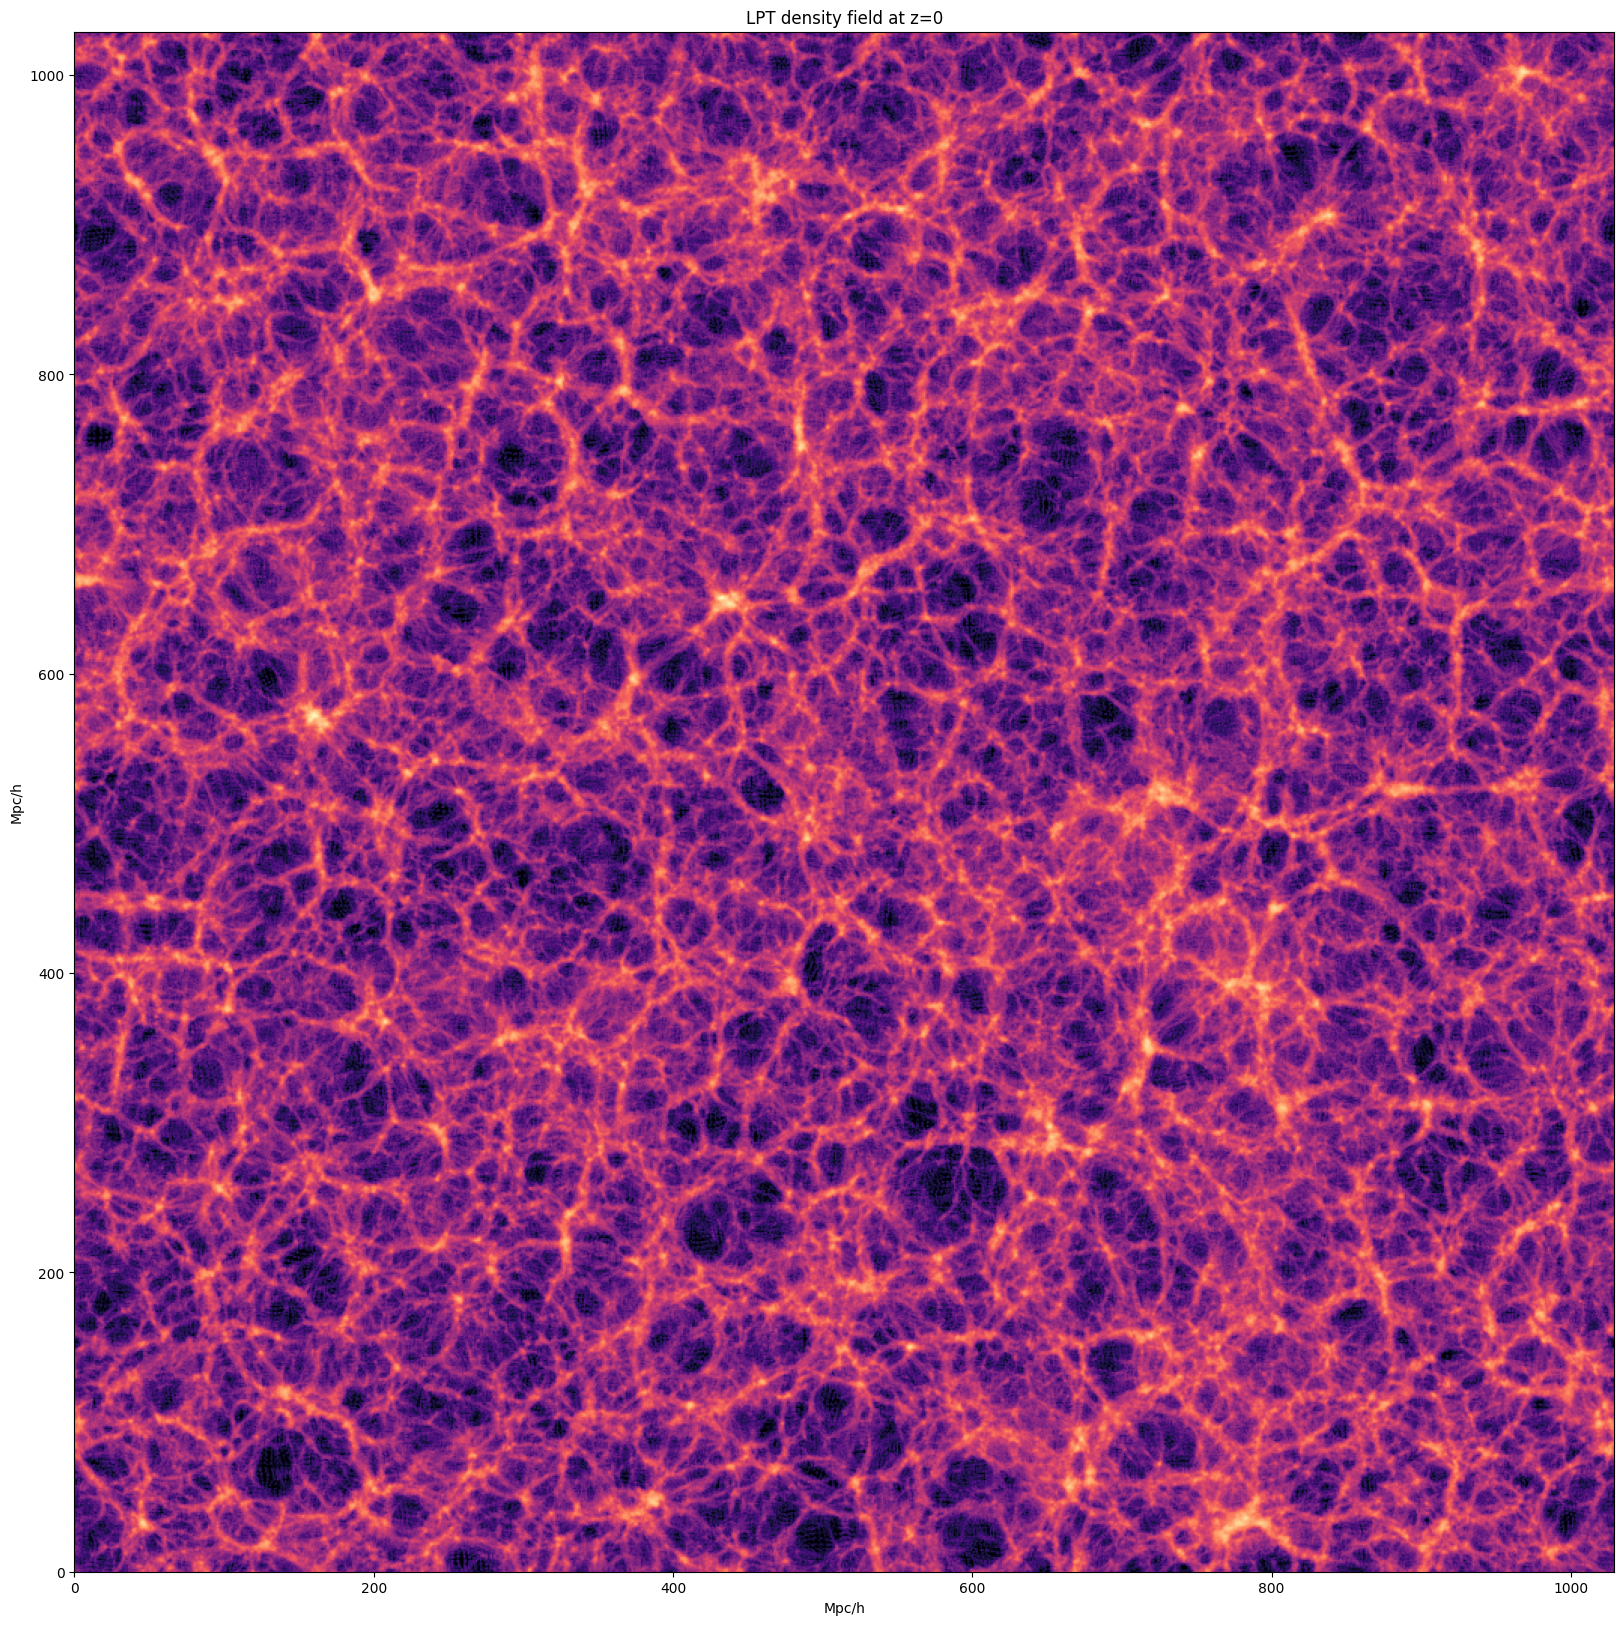

In [5]:
# Projection axis and box size
proj_axis = 0
box_size = 1024 + 5
plt.figure(figsize=(20, 20))
# Generate the plot
plt.imshow(np.log10(field[-16:].sum(axis=proj_axis) + 1), cmap='magma', extent=[0, box_size, 0, box_size])
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.title('LPT density field at z=0')
plt.savefig(f'test.png', dpi=300, bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()

In [ ]:
import pyopenvdb as openvdb
import numpy as np

field = np.load('/home/wassim/Projects/NBody/Blender_tutorial/jaxpm/field.npz')

grid = openvdb.FloatGrid()

grid.copyFromArray(field['arr_0'].astype(float))


grid.transfrom = openvdb.createLinearTransform(voxelSize=1/(64))
#grid.gridClass = openvdb.GridClass.FOG_VOLUME
grid.name = "field"
openvdb.write("/home/wassim/Downloads/field.vdb", grids=grid)

